# Analyze MTurk Data: Establish Worker Requirements

This notebook evaluates MTurk workers across MOS results to help you define how many HITs a worker should complete in order for their results to be considered valid. Usually the MOS results show a linear trend in score versus number of HITs completed; this implies that workers become much more critical over time. In order to normalize this trend, we want to ignore workers who have completed too few HITs. This notebook will help you set that limit.

In [1]:
# NOTE: This CSV can be downloaded from MTurk after receiving results from a batch.
PATH = '~/Downloads/Batch_3829940_batch_results_ALL.csv'

In [2]:
%matplotlib inline

from IPython.display import display
from IPython.display import Markdown

import pandas

data_frame = pandas.read_csv(PATH)

## Compute and Analyze MOS Score

In [3]:
import math

def label_to_score(label):
    """ Get the MOS score from the MOS label.
    """
    tokens = label.lower().split()
    if 'excellent' in tokens:
        return 5.0
    elif 'good' in tokens:
        return 4.0
    elif 'fair' in tokens:
        return 3.0
    elif 'poor' in tokens:
        return 2.0
    elif 'bad' in tokens:
        return 1.0
    raise ValueError()

data_frame['MOS'] = data_frame[['Answer.audio-naturalness.label']].apply(
     lambda r: r[0] if isinstance(r[0], str) else r[1], axis=1)

data_frame['MOS'] = data_frame['MOS'].apply(label_to_score)
display(Markdown('#### Mean Opinion Score (MOS)'))
data_frame['MOS'].describe()

#### Mean Opinion Score (MOS)

count    1536.000000
mean        3.755859
std         1.039747
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: MOS, dtype: float64

### Visualize Existing Trend in MOS v HIT Count

Plot the data with a regex line and 95% confidence interval around the line to visualize the existing trend.

#### Worker MOS Score Distribution

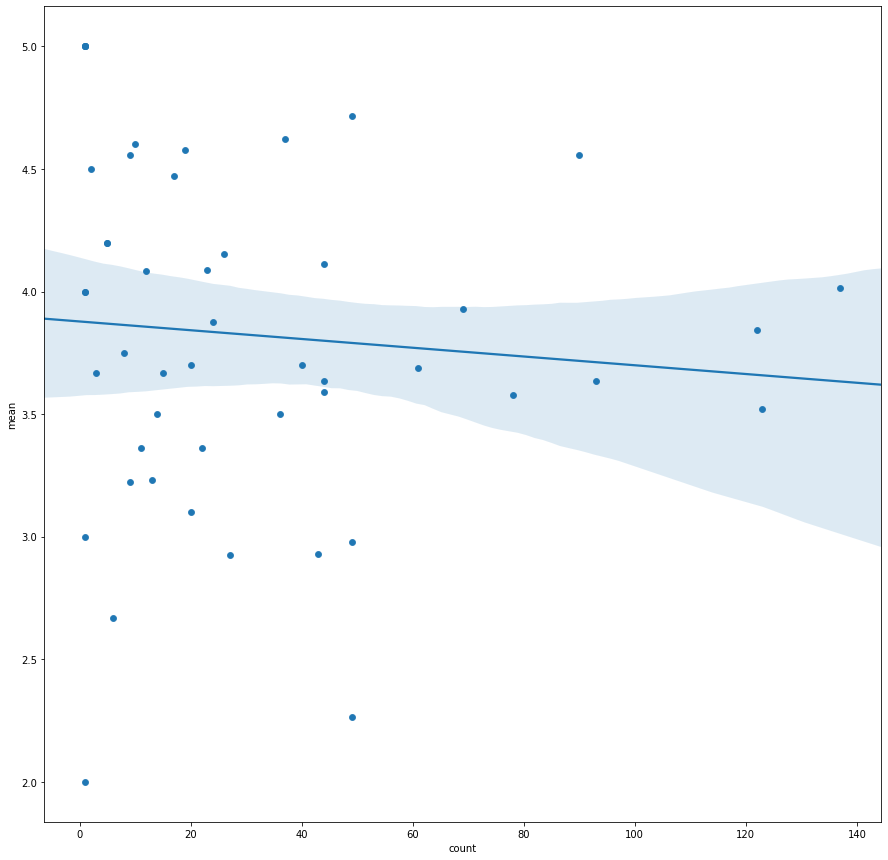

In [4]:
# We will use seaborn for plotting. More info can be found here: https://seaborn.pydata.org/tutorial/regression.html
import seaborn as sns

display(Markdown('#### Worker MOS Score Distribution'))
distr = data_frame.groupby('WorkerId')['MOS'].describe().sort_values(by=['count'])
distr.plot.scatter(x='count', y='mean', figsize=(15,15))
sns.regplot(x="count", y="mean", data=distr)

Note the negative trend in data as users analyze more HITs.

Let's normalize this by ignoring workers' responses if the worker has only seen N number of HITs. Play with N until you see the slope of the line go to 0.

#### Worker MOS Score Distribution (Filtered by count)

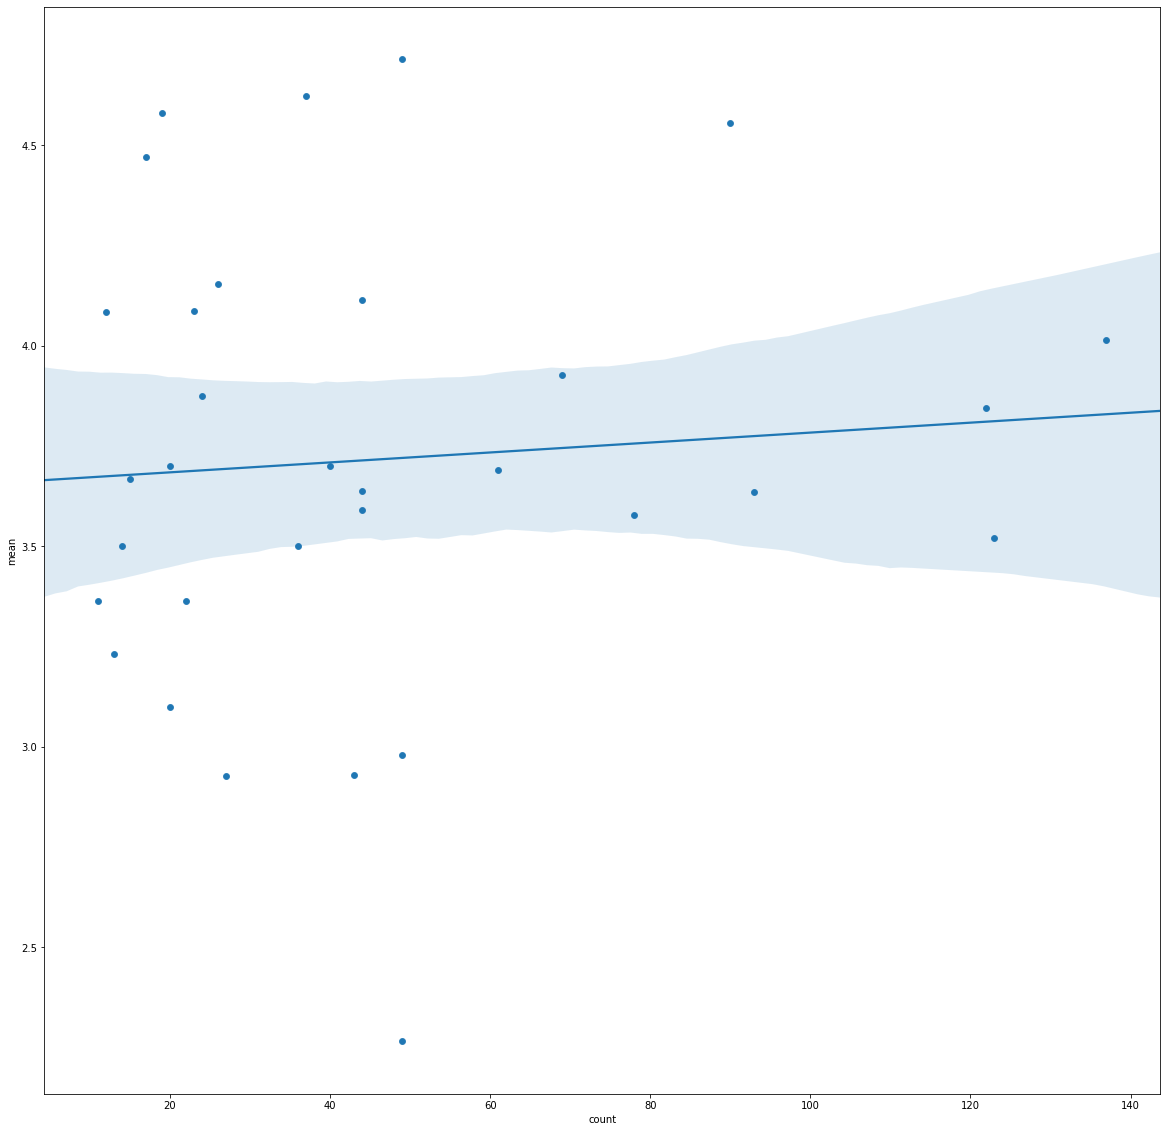

In [5]:
n = 10

# Filter workers out that completed less than X HITs
display(Markdown('#### Worker MOS Score Distribution (Filtered by count)'))
filtered = data_frame.groupby('WorkerId').filter(lambda x: len(x)>n).groupby('WorkerId')['MOS'].describe().sort_values(by=['count'])

filtered.plot.scatter(x='count', y='mean', figsize=(20,20))
sns.regplot(x="count", y="mean", data=filtered)

**NOTE:** *n=10 seems to overcompensate. Play with n until you see the slope of the regression line approach 0. This will be the limit to number of HITs you require from workers in order to keep and analyze their results.*